In [1]:
!pip install numpy
!pip install nltk
!pip install emoji
!pip install pandas


In [2]:
!pip install htmlparser
!pip install markupbase

ERROR: Could not find a version that satisfies the requirement markupbase (from versions: none)
ERROR: No matching distribution found for markupbase


In [1]:
import emoji
import os
import glob
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
path = 'C:\\Users\\user\\Twitter analysis Project\\data\\all_tweets'

# Check current working directory.
retval = os.getcwd()
print("Current working directory %s" % retval)

# Now change the directory
os.chdir(path)

# Check current working directory.
retval = os.getcwd()

print("Directory changed successfully %s" % retval)

Current working directory C:\Users\user\Twitter analysis Project
Directory changed successfully C:\Users\user\Twitter analysis Project\data\all_tweets


In [3]:
#Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:

#combine all files in the list
df_tweets = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [5]:
#Check first 5 rows of df_tweets dataset
df_tweets.head()

,text,date,user,location,keyword
0,RT @FaheemYounus: To “the vaccine have side ef...,2021-05-09 18:20:37,thischeena,NaN,vaccine
1,@_AfricanSoil From my own observation\nI don't...,2021-05-09 18:20:37,mokwenalebogan3,"Pretoria, South Africa",vaccine
2,RT @nowthisnews: ‘Grow the f*ck up and get the...,2021-05-09 18:20:37,rewir8rh83,"ÜT: 37.678799,-120.987029",vaccine
3,RT @vivekagnihotri: Whoever I speak to abroad ...,2021-05-09 18:20:37,monambuj,NaN,vaccine
4,RT @MinhazMerchant: Kejriwal must rank as the ...,2021-05-09 18:20:36,Md_Ayesha_,"Dubai, United Arab Emirates",vaccine


In [6]:
df_tweets.shape

(43752, 5)

In [7]:
#Get summary of df_tweets dataframe
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43752 entries, 0 to 6052
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      43752 non-null  object
 1   date      43752 non-null  object
 2   user      43752 non-null  object
 3   location  29497 non-null  object
 4   keyword   43752 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [8]:
#Check sum of missing values in each column of df_tweets dataframe
df_tweets.isnull().sum()

text            0
date            0
user            0
location    14255
keyword         0
dtype: int64

In [9]:
# Convert created_at and account_created_at variables from object to datetime64 
df_tweets['date'] = df_tweets['date'].astype('datetime64')
# Check for earliest and latest tweet
print("Earliest tweet: ", df_tweets['date'].min())
print("Latest tweet: ", df_tweets['date'].max(), '\n')

Earliest tweet:  2021-05-09 14:50:00
Latest tweet:  2021-05-15 18:55:03 



In [10]:
df_tweets.head(10)

,text,date,user,location,keyword
0,RT @FaheemYounus: To “the vaccine have side ef...,2021-05-09 18:20:37,thischeena,NaN,vaccine
1,@_AfricanSoil From my own observation\nI don't...,2021-05-09 18:20:37,mokwenalebogan3,"Pretoria, South Africa",vaccine
2,RT @nowthisnews: ‘Grow the f*ck up and get the...,2021-05-09 18:20:37,rewir8rh83,"ÜT: 37.678799,-120.987029",vaccine
3,RT @vivekagnihotri: Whoever I speak to abroad ...,2021-05-09 18:20:37,monambuj,NaN,vaccine
4,RT @MinhazMerchant: Kejriwal must rank as the ...,2021-05-09 18:20:36,Md_Ayesha_,"Dubai, United Arab Emirates",vaccine
5,RT @emilyyyhu: Me two hours ago: this vaccine ...,2021-05-09 18:20:35,mihu0307,By Liliana's side | She/They |,vaccine
6,@Melorra99 @VaxHuntersCan It's moving really q...,2021-05-09 18:20:35,kpnov23,NaN,vaccine
7,RT @BBCWorld: Dracula's castle in Romania offe...,2021-05-09 18:20:35,warlockthunder1,"Oakville, Ontario",vaccine
8,@nowthisnews While all the Twitheads out there...,2021-05-09 18:20:34,kadb99,NaN,vaccine
9,RT @calamur: have you seen the photo on our va...,2021-05-09 18:20:34,MANJITSINGHARYA,haryana (india),vaccine


In [11]:
df_tweets.to_csv (r'C:\\Users\\user\\Untitled Folder 3\\data\\total_tweets.csv', index = False, header=True)

In [12]:
df_tweets.duplicated(subset=['text']).sum()

1154

In [13]:
new_df=df_tweets.drop_duplicates(subset=['text'])

In [14]:
new_df.shape

(42598, 5)

In [15]:
import re
#a pipeline to clean up text  for VADER
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text) 
    #remove url links
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                  '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    return text

In [16]:
#Apply text cleaning function to cleaned_text column in df_tweets dataframe
df_tweets['text'] = df_tweets['text'].apply(lambda x: tweet_cleaner(x))

In [17]:
df_tweets.head(10)

,text,date,user,location,keyword
0,To “the vaccine have side effects” crowd If yo...,2021-05-09 18:20:37,thischeena,NaN,vaccine
1,From my own observation I don't see that comin...,2021-05-09 18:20:37,mokwenalebogan3,"Pretoria, South Africa",vaccine
2,‘Grow the f*ck up and get the vaccine’ — These...,2021-05-09 18:20:37,rewir8rh83,"ÜT: 37.678799,-120.987029",vaccine
3,Whoever I speak to abroad speaks very highly o...,2021-05-09 18:20:37,monambuj,NaN,vaccine
4,Kejriwal must rank as the shiftiest politician...,2021-05-09 18:20:36,Md_Ayesha_,"Dubai, United Arab Emirates",vaccine
5,Me two hours ago: this vaccine ain’t sh*t Me now:,2021-05-09 18:20:35,mihu0307,By Liliana's side | She/They |,vaccine
6,It's moving really quick. I was not priority a...,2021-05-09 18:20:35,kpnov23,NaN,vaccine
7,Dracula's castle in Romania offers tourists Co...,2021-05-09 18:20:35,warlockthunder1,"Oakville, Ontario",vaccine
8,While all the Twitheads out there are preachin...,2021-05-09 18:20:34,kadb99,NaN,vaccine
9,have you seen the photo on our vaccine certifi...,2021-05-09 18:20:34,MANJITSINGHARYA,haryana (india),vaccine


In [18]:
df_tweets.duplicated(subset=['text']).sum()

3211

In [19]:
new_df=df_tweets.drop_duplicates(subset=['text'])

In [20]:
new_df.shape

(40541, 5)

In [21]:
new_df.to_csv (r'C:\\Users\\user\\Untitled Folder 3\\data\\vadercleanedtweets.csv', index = False, header=True)

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [24]:
new_df['scores'] = new_df['text'].apply(lambda text: sid.polarity_scores(text))

new_df.head(10)

<ipython-input-24-06c7c38546eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['scores'] = new_df['text'].apply(lambda text: sid.polarity_scores(text))


,text,date,user,location,keyword,scores
0,To “the vaccine have side effects” crowd If yo...,2021-05-09 18:20:37,thischeena,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,From my own observation I don't see that comin...,2021-05-09 18:20:37,mokwenalebogan3,"Pretoria, South Africa",vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,‘Grow the f*ck up and get the vaccine’ — These...,2021-05-09 18:20:37,rewir8rh83,"ÜT: 37.678799,-120.987029",vaccine,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp..."
3,Whoever I speak to abroad speaks very highly o...,2021-05-09 18:20:37,monambuj,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Kejriwal must rank as the shiftiest politician...,2021-05-09 18:20:36,Md_Ayesha_,"Dubai, United Arab Emirates",vaccine,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp..."
5,Me two hours ago: this vaccine ain’t sh*t Me now:,2021-05-09 18:20:35,mihu0307,By Liliana's side | She/They |,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,It's moving really quick. I was not priority a...,2021-05-09 18:20:35,kpnov23,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,Dracula's castle in Romania offers tourists Co...,2021-05-09 18:20:35,warlockthunder1,"Oakville, Ontario",vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,While all the Twitheads out there are preachin...,2021-05-09 18:20:34,kadb99,NaN,vaccine,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou..."
9,have you seen the photo on our vaccine certifi...,2021-05-09 18:20:34,MANJITSINGHARYA,haryana (india),vaccine,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp..."


In [25]:
def sentimentPredict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [26]:
new_df['label'] =new_df['scores'].apply(lambda x: sentimentPredict(x))

<ipython-input-26-d657f5addbba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label'] =new_df['scores'].apply(lambda x: sentimentPredict(x))


In [27]:
new_df.head(10)

,text,date,user,location,keyword,scores,label
0,To “the vaccine have side effects” crowd If yo...,2021-05-09 18:20:37,thischeena,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,From my own observation I don't see that comin...,2021-05-09 18:20:37,mokwenalebogan3,"Pretoria, South Africa",vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,‘Grow the f*ck up and get the vaccine’ — These...,2021-05-09 18:20:37,rewir8rh83,"ÜT: 37.678799,-120.987029",vaccine,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",Positive
3,Whoever I speak to abroad speaks very highly o...,2021-05-09 18:20:37,monambuj,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,Kejriwal must rank as the shiftiest politician...,2021-05-09 18:20:36,Md_Ayesha_,"Dubai, United Arab Emirates",vaccine,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",Negative
5,Me two hours ago: this vaccine ain’t sh*t Me now:,2021-05-09 18:20:35,mihu0307,By Liliana's side | She/They |,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
6,It's moving really quick. I was not priority a...,2021-05-09 18:20:35,kpnov23,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
7,Dracula's castle in Romania offers tourists Co...,2021-05-09 18:20:35,warlockthunder1,"Oakville, Ontario",vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
8,While all the Twitheads out there are preachin...,2021-05-09 18:20:34,kadb99,NaN,vaccine,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",Negative
9,have you seen the photo on our vaccine certifi...,2021-05-09 18:20:34,MANJITSINGHARYA,haryana (india),vaccine,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",Positive


In [30]:
positive = new_df[new_df['label']== 'Positive']
negative = new_df[new_df['label']== 'Negative']
neutral=new_df[new_df['label']=='Neutral']

In [31]:
print(f'total no of positive tweets:' ,len(positive) )
print(f'total no of negative tweets:' ,len(negative) )
print(f'total no of neutral tweets:' ,len(neutral) )

total no of positive tweets: 15376
total no of negative tweets: 11181
total no of neutral tweets: 13984


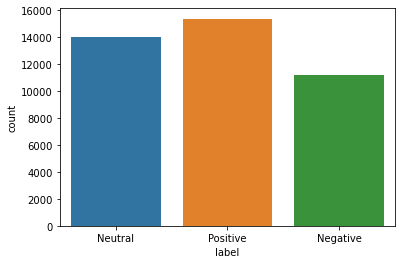

In [32]:
import seaborn as sns
sns.countplot(new_df['label'], label='count') 

In [18]:
new_df.to_csv (r'C:\\Users\\user\\Twitter analysis Project\\data\\tweets_sentimentjuly20.csv', index = False, header=True)